In [1]:
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sms-spam-collection-dataset/spam.csv


## Reading CSV Files

In [2]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin1')
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Checking for null values

In [4]:
nan_count = df.isna().sum()
print(nan_count)

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


As our of 5572 entries are there in which unnamed 2,3,4 have almost no data. We are removing it from dataset.

In [5]:
df = df.iloc[:, :-3]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Visualizing the data

In [6]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

This means out of 5572 SMS received. 4825 are not spam whereas 747 messages are spam SMS.

<Axes: xlabel='v1', ylabel='count'>

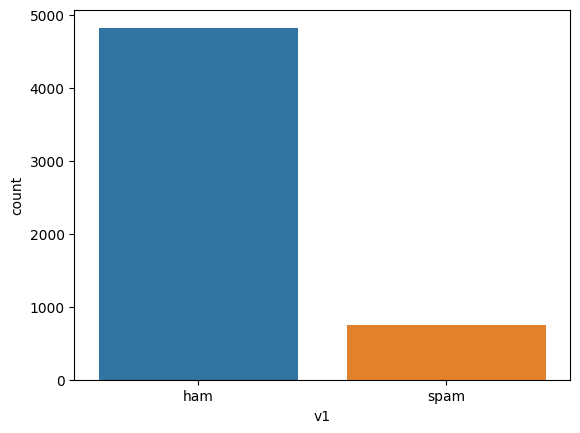

In [7]:
sns.countplot(x=df['v1'])

## Adding a column with size of the SMS

In [8]:
df['length of SMS']=df['v2'].apply(len)
df

,v1,v2,length of SMS
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [9]:
df['length of SMS'].max()

910

This means the max length of letters of SMS is 910

In [10]:
df['length of SMS'].idxmax()

1084

1084 is the index of maximum size of the SMS

In [11]:
df.iloc[df['length of SMS'].idxmax()][1]

/tmp/ipykernel_33/1787003726.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[df['length of SMS'].idxmax()][1]


"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

The abobve is the SMS which is longest size in dataset.

In [12]:
df['length of SMS'].min()

2

The minimum size of SMS is 2

In [13]:
df.iloc[df['length of SMS'].idxmin()][1]

/tmp/ipykernel_33/3952814375.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[df['length of SMS'].idxmin()][1]


'Ok'

The above message is the SMS with smallest length.

## Data PreProcessing

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
all_stopwords=stopwords.words('english')
all_stopwords.remove('not')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any'

Stopwords are common words that are frequently removed during text processing because they lack meaningful significance. Stopwords include "the", "is", "and", "of", and so on. Stopwords are commonly removed in natural language processing (NLP) in order to focus on more meaningful words in a document.

In natural language processing, a corpus is a collection of written documents used for analysis or training. This collection could contain books, articles, emails, and social media updates. Corpora (plural of corpus) are required for many NLP tasks, including text classification, sentiment analysis, and language modeling.


### Applying all above methods

In [15]:
from nltk.stem import PorterStemmer
ps= PorterStemmer()

Stemming is the process of reducing words to their root or basic form, frequently removing suffixes and prefixes. This method aids in the normalization of words, ensuring that diverse versions of the same term are considered as one. The Porter stemming algorithm uses a set of principles to exclude common suffixes prevalent in English words. It is a heuristic strategy aimed at removing suffixes while preserving the fundamental meaning of words. While it is not flawless and may occasionally create stemmed forms that are not genuine English words, it is computationally efficient and commonly employed in text processing applications.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer is a natural language processing (NLP) approach that converts a collection of text documents into a token count matrix. It is a method for vectorizing textual data, which is an important step in many NLP applications like text classification, clustering, and information retrieval.


In [17]:
corpus = []

for i in range(len(df)):
    s = re.sub('[^a-zA-Z]', " ", df['v2'][i])
    s = s.lower()
    s =s.split()
    s =[ps.stem(word) for word in s if not word in set(all_stopwords)] 
    s =  " ".join(s)
    corpus.append(s)

corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother not like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank brea

### Countvectorizer to convert object to vector

In [18]:
cv=CountVectorizer()
cv.fit_transform(corpus).toarray().shape

(5572, 6222)

In [19]:
cv.fit_transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Building Naive Bayes Classifier

In [21]:
x=cv.fit_transform(corpus).toarray()
y=df['v1']

In [22]:
print("Number of samples in x:", len(x))
print("Number of samples in y", len(y))

Number of samples in x: 5572
Number of samples in y 5572


### Dividing Dataset into Training and Testing Dataset


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [26]:
x_train.shape ,x_test.shape

((4457, 6222), (1115, 6222))

With 80% of data for training and 20% for testing, the data is splitted. Now, we have 4457 for training and 1115 for testing.

In [27]:
y_train.shape , y_test.shape

((4457,), (1115,))

As the dimensions matched, the model is ready to be trained.

## Training Model

In [28]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

## Testing Model

In [29]:
y_pred=model.predict(x_test)
y_pred

array(['ham', 'ham', 'spam', ..., 'spam', 'spam', 'spam'], dtype='<U4')

In [30]:
y_test.values

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'spam'], dtype=object)

## Model Evaluation

In [31]:
from sklearn.metrics import confusion_matrix ,accuracy_score , classification_report
print(accuracy_score(y_test,y_pred))

0.862780269058296


The accuracy of the model was determined to be 86.27%.

In [32]:
print(confusion_matrix(y_test,y_pred))

[[828 137]
 [ 16 134]]


1. Values correctly detected by the algorithm were 828 true positive (these are already positive and algorithm said this .)

2. 134 true negative (they are already negative and algorithm said this .)

3. There are 137 false positive , the algorithm failed to detect them ( they are already negative but algorithm said positive.

4. There are 16 false negative , the algorithm failed to detect them ( they are positive but algorithm not said this

In [33]:
print( classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

         ham       0.98      0.86      0.92       965
        spam       0.49      0.89      0.64       150

    accuracy                           0.86      1115
   macro avg       0.74      0.88      0.78      1115
weighted avg       0.92      0.86      0.88      1115



1. precision = the exact value, in the sense of how much algorithm said it was correct and it was indeed correct.

2. the recall value means how much the algorithm detects from the requested.

3. f1 score repesents the efficiency of relationship between precision and recall

In [34]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
    print("Saved successfully")

Saved successfully
